In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# First, we get the data
from google.colab import drive
drive.mount('/content/drive')

CSV_PATH = '/content/drive/MyDrive/dataset/multilabel/Combined.csv'
df = pd.read_csv(CSV_PATH)

print("Original shape:", df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-10-1538686137.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


Original shape: (1215890, 52)


In [ ]:
FEATURES = [
    'Seq', 'Dur', 'Mean', 'sTos', 'dTos', 'sTtl', 'dTtl',
    'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes',
    'DstBytes', 'Offset', 'Load', 'SrcLoad', 'DstLoad', 'Loss',
    'SrcLoss', 'DstLoss', 'pLoss', 'SrcRate', 'DstRate', 'Rate',
    'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'TcpRtt',
    'State', 'Proto'
]

columns_to_keep = FEATURES + ['Attack Type']
df = df[columns_to_keep]

In [ ]:
df = pd.get_dummies(df, columns=['State', 'Proto'])

In [ ]:
print(df.columns.tolist())

['Seq', 'Dur', 'Mean', 'sTos', 'dTos', 'sTtl', 'dTtl', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcRate', 'DstRate', 'Rate', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'TcpRtt', 'Attack Type', 'State_ACC', 'State_CON', 'State_ECO', 'State_FIN', 'State_INT', 'State_NRS', 'State_REQ', 'State_RSP', 'State_RST', 'State_TST', 'State_URP', 'Proto_arp', 'Proto_icmp', 'Proto_ipv6-icmp', 'Proto_llc', 'Proto_lldp', 'Proto_sctp', 'Proto_tcp', 'Proto_udp']


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
print(df.columns.tolist())

['Seq', 'Dur', 'Mean', 'sTos', 'dTos', 'sTtl', 'dTtl', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcRate', 'DstRate', 'Rate', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'TcpRtt', 'Attack Type', 'State_ACC', 'State_CON', 'State_ECO', 'State_FIN', 'State_INT', 'State_NRS', 'State_REQ', 'State_RSP', 'State_RST', 'State_TST', 'State_URP', 'Proto_arp', 'Proto_icmp', 'Proto_ipv6-icmp', 'Proto_llc', 'Proto_lldp', 'Proto_sctp', 'Proto_tcp', 'Proto_udp']


In [ ]:
le = LabelEncoder()
df['Attack Type'] = le.fit_transform(df['Attack Type'])

print("\nLabel classes:", le.classes_)
print("\nTarget distribution before SMOTE:\n", df['Attack Type'].value_counts())


Label classes: ['Benign' 'HTTPFlood' 'ICMPFlood' 'SYNFlood' 'SYNScan' 'SlowrateDoS'
 'TCPConnectScan' 'UDPFlood' 'UDPScan']

Target distribution before SMOTE:
 Attack Type
0    477737
7    457340
1    140812
5     73124
6     20052
4     20043
8     15906
3      9721
2      1155
Name: count, dtype: int64


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['Seq', 'Dur', 'Mean', 'sTos', 'dTos', 'sTtl', 'dTtl', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcRate', 'DstRate', 'Rate', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'TcpRtt', 'Attack Type', 'State_ACC', 'State_CON', 'State_ECO', 'State_FIN', 'State_INT', 'State_NRS', 'State_REQ', 'State_RSP', 'State_RST', 'State_TST', 'State_URP', 'Proto_arp', 'Proto_icmp', 'Proto_ipv6-icmp', 'Proto_llc', 'Proto_lldp', 'Proto_sctp', 'Proto_tcp', 'Proto_udp']


In [ ]:
df = df.select_dtypes(include=[np.number, 'bool'])

X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X.columns.tolist())

['Seq', 'Dur', 'Mean', 'sTos', 'dTos', 'sTtl', 'dTtl', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcRate', 'DstRate', 'Rate', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'TcpRtt', 'State_ACC', 'State_CON', 'State_ECO', 'State_FIN', 'State_INT', 'State_NRS', 'State_REQ', 'State_RSP', 'State_RST', 'State_TST', 'State_URP', 'Proto_arp', 'Proto_icmp', 'Proto_ipv6-icmp', 'Proto_llc', 'Proto_lldp', 'Proto_sctp', 'Proto_tcp', 'Proto_udp']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("\nBefore SMOTE:", np.bincount(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_smote))


Before SMOTE: [382189 112650    924   7777  16034  58499  16042 365872  12725]
After SMOTE: [382189 382189 382189 382189 382189 382189 382189 382189 382189]


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

unique_labels = np.unique(y_test)
target_names = le.inverse_transform(unique_labels)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))


Classification Report:

                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     95548
     HTTPFlood       1.00      1.00      1.00     28162
     ICMPFlood       1.00      1.00      1.00       231
      SYNFlood       1.00      1.00      1.00      1944
       SYNScan       1.00      1.00      1.00      4009
   SlowrateDoS       1.00      1.00      1.00     14625
TCPConnectScan       1.00      1.00      1.00      4010
      UDPFlood       1.00      1.00      1.00     91468
       UDPScan       1.00      1.00      1.00      3181

      accuracy                           1.00    243178
     macro avg       1.00      1.00      1.00    243178
  weighted avg       1.00      1.00      1.00    243178



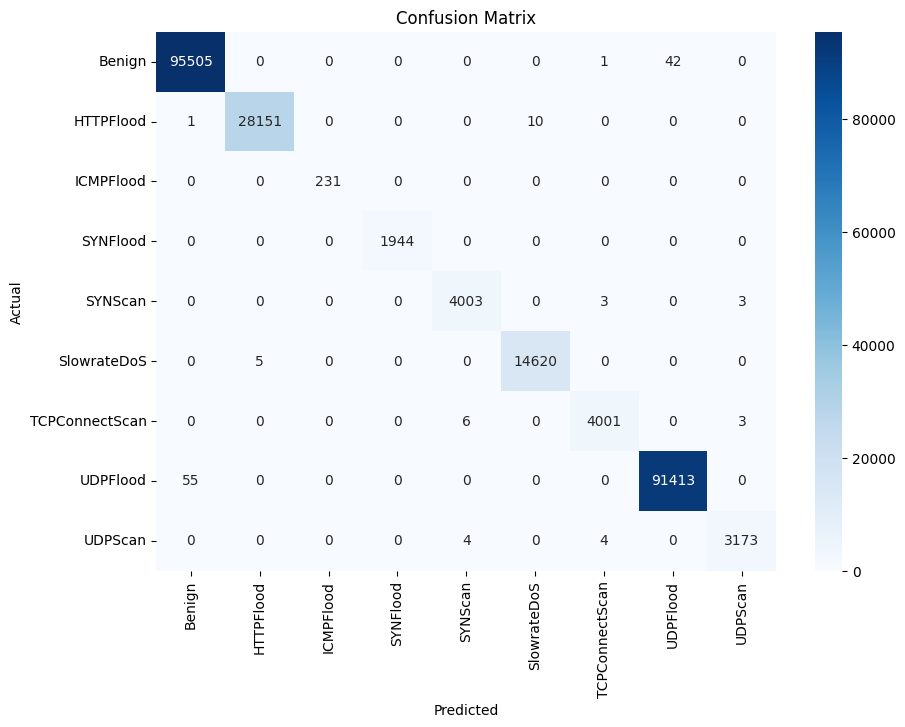

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(clf, '/content/drive/MyDrive/model/rf_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/model/rf_scaler.pkl')
joblib.dump(le, '/content/drive/MyDrive/model/rf_label_encoder.pkl')

print("\n✅ Saved: rf_model.pkl, rf_scaler.pkl, rf_label_encoder.pkl")


✅ Saved: rf_model.pkl, rf_scaler.pkl, rf_label_encoder.pkl
